[1] 600  11

[1] "age"         "sex"         "region"      "income"      "married"    
 [6] "children"    "car"         "save_act"    "current_act" "mortgage"   
[11] "pep"

[1] 400  11

[1] 200  11

Accuracy 
   0.875

               
Prediction_tree NO YES
            NO  97  18
            YES  7  78

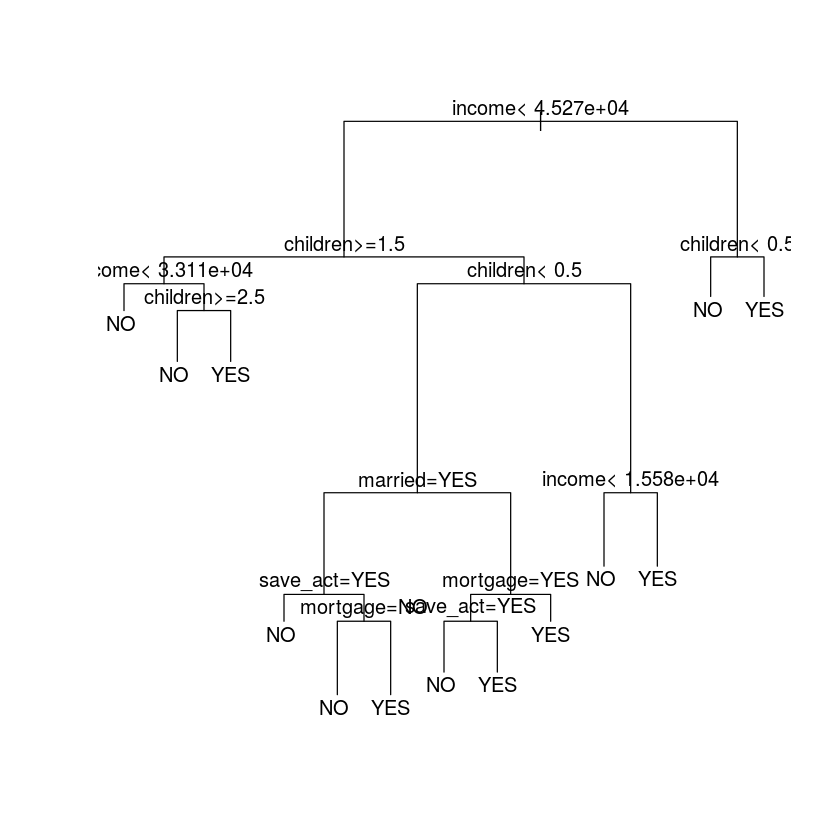


Call:
roc.default(response = Testing$pep, predictor = Prediction_tree[,     2])

Data: Prediction_tree[, 2] in 104 controls (Testing$pep NO) < 96 cases (Testing$pep YES).
Area under the curve: 0.8704

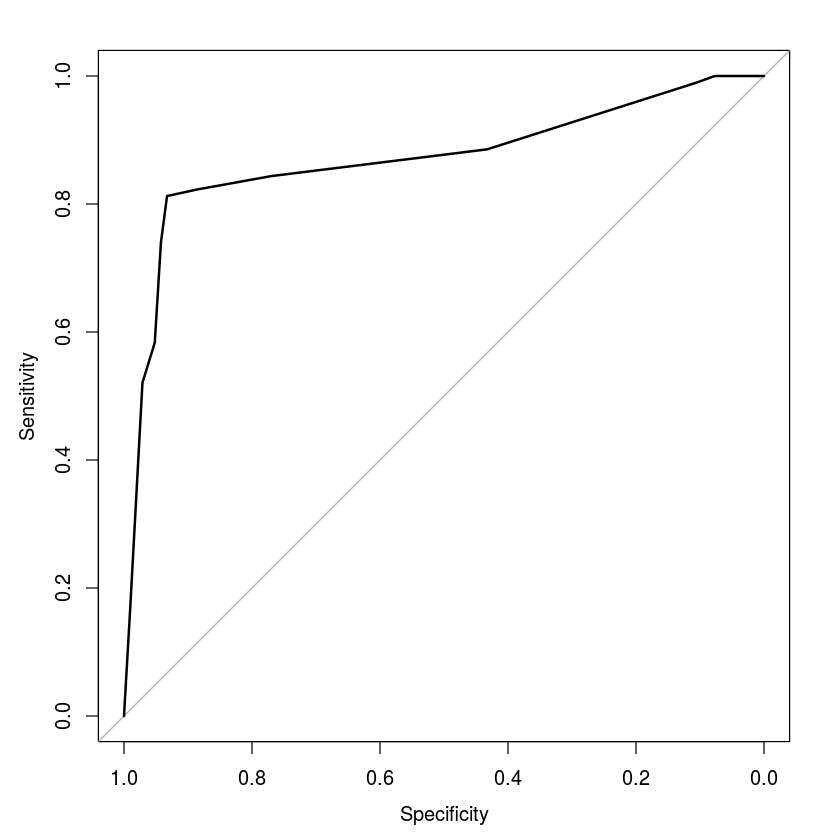

Accuracy 
   0.845

             
Prediction_rf NO YES
          NO  92  19
          YES 12  77

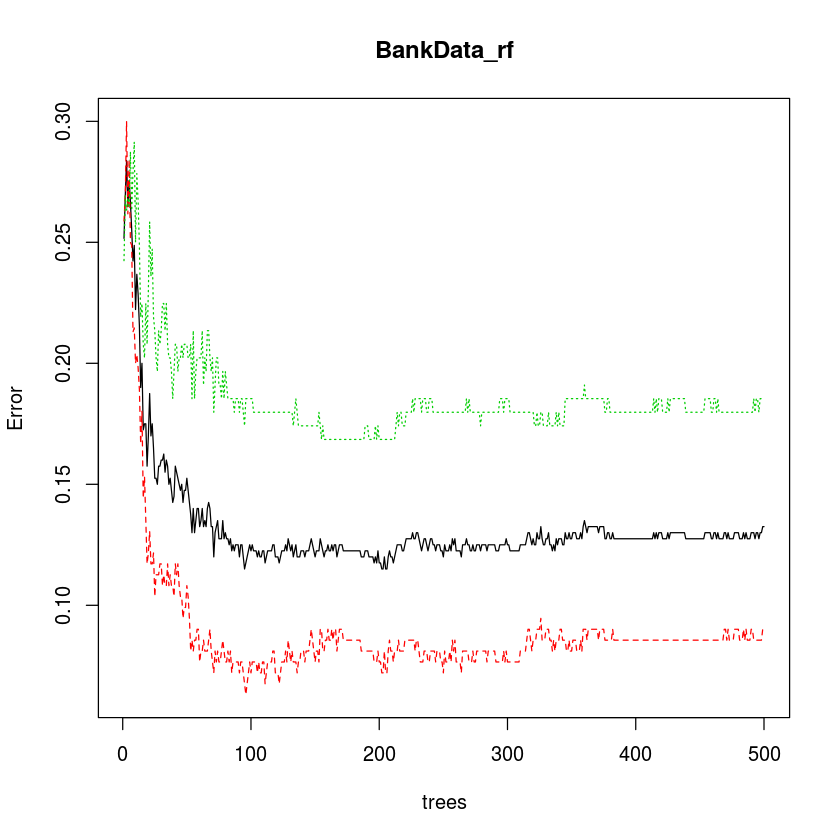


Call:
roc.default(response = Testing$pep, predictor = Predictions[,     2])

Data: Predictions[, 2] in 104 controls (Testing$pep NO) < 96 cases (Testing$pep YES).
Area under the curve: 0.8952

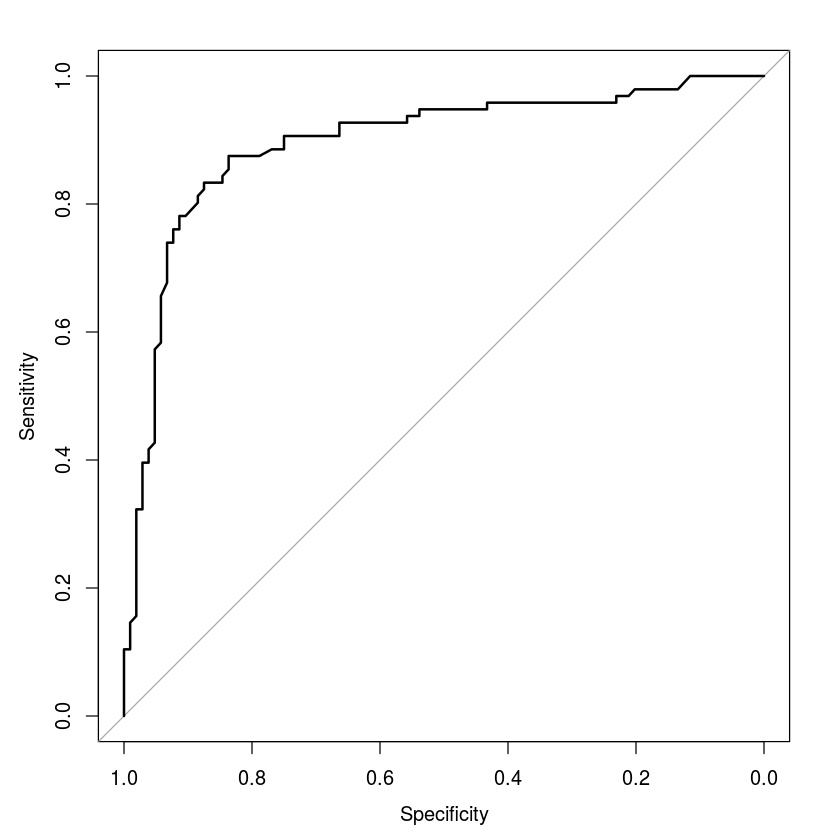

In [3]:
library(data.table)
library(dplyr)
library(rpart)
library(pROC)
library(caret)
library(randomForest)

# Read bank data

Bank_data = read.csv('Bank Data.csv')
Bank_data = data.table(Bank_data)
dim(Bank_data)

colnames(Bank_data)

#Creating test and traing sample data
index = 1:nrow(Bank_data)
traingIndex = sample(index, trunc(length(index)/3))
Testing = Bank_data[traingIndex, ]
Training = Bank_data[-traingIndex, ]

dim(Training)
dim(Testing)

#### Using binary tree and pruning #######
# creating decision tree model with all the attributes

Decision_treeModel = rpart(pep~. , data = Training, method = "class")

#pruning tree

Decision_treeModel = prune(Decision_treeModel, cp= Decision_treeModel$cptable[which.min(Decision_treeModel$cptable[,"xerror"]),"CP"])

# plot the tree and summerize

plot(Decision_treeModel)
text(Decision_treeModel, pretty=0)
#print(Decision_treeModel)
#summary(Decision_treeModel)


#Prediction for accuracy

Prediction_tree = predict( Decision_treeModel,newdata=Testing,type="class")

#finding accuracy
conf.tree = confusionMatrix(table(Prediction_tree,Testing$pep))
conf.tree$overall[1]
conf.tree$table


#Prediction for AUC 

Prediction_tree = predict(Decision_treeModel, Testing, type = "prob")

# finding AUC and plotting ROC

ROC_curve= roc(Testing$pep, Prediction_tree[,2])
plot(ROC_curve)

#### using Random forest ######
# create data model with all the attributes 

BankData_rf = randomForest(pep~. , data = Training)

# plot the tree and summerize

plot(BankData_rf)
#print(BankData_rf)
#summary(BankData_rf)

#Prediction for accuracy after random forest
Prediction_rf = predict(BankData_rf, Testing, OOB=TRUE, type = "response")

#finding accuracy
conf.treerf = confusionMatrix(table(Prediction_rf,Testing$pep))
conf.treerf$overall[1]
conf.treerf$table 

# finding AUC and plotting ROC
Predictions = predict(BankData_rf, Testing, type='prob')
auc = auc(Testing$pep, Predictions[,2])
plot(roc(Testing$pep, Predictions[,2]))

#conclusion of results. 
#In the beginning it looked like the attributes gender, car and mortgage may not have effect on accuracy. But, the best accuracy can be reached when all the attributes are considered. 
#The binary tree and pruning is giving 89.5% accuracy whereas random forest is giving 88.5% accyracy. the range is varying for different sets of data. Most of the time Random forest is giving better accuracy. 
#The best accuracy is reached with all the attributes. The maximum accuracy is 89.5%.the range in between 80-89%
# The maximum Area under curve is 92.74%. the range in between 85-93%. 
# Considering all the above points, it can be concluded that due to very small number of data, for this model, random forest is working better that pruning with all the attributes of the table. less attriutes are giving less accuracy. Hence, I did not remove any attributes for this dataset.
# For both Decision tree and random forest, ROC curves are plotted below. (please run the program)



